# Data visualizer for all participants in AV_experiment
Ignore first part, its just housekeeping

In [39]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
from statannot import add_stat_annotation

sns.set()
sns.set_theme()

In [40]:
# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [41]:
#read in source csv
df = pd.read_csv (r'Database_AllParticipants_av_experiment_122522_2021-04-23_13h18.02_56a30dc2-a436-11eb-a79b-ac1f6b405aea.csv', encoding='utf-8-sig')
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569 entries, 0 to 3568
Columns: 109 entries, choice_response.corr to Name_optional
dtypes: float64(64), int64(5), object(40)
memory usage: 3.0+ MB
['choice_response.corr', 's_adjust.thisIndex', 'xResolution', 'SJ_trials_skip.thisIndex', 'SJ_trials_after.thisN', 'cont_0.keys', 'cont_2.keys', 's_adjust.thisN', 'cont_3.keys', 'participant', 'SJ_trials_after.thisIndex', 'cond', '__datetime', 'SJ_trials_after.ran', 'choice_response.rt', 'trials.ran', 'response_distortion.corr', 'group', 'cont_5.rt', 'key_resp.rt', 'entity2', 'psychopyVersion', 'attribute1', 'choice_response.keys', 'cont_6.rt', 'SJ_trials_before.thisN', 'imagePath2', 'exit.rt', 'SJ_trials_before.thisIndex', 'key_resp.keys', 'SJ_trials_between.thisTrialN', 'SJ_trials_after.thisRepN', 's_adjust.ran', 'training.thisIndex', 's_adjust.thisRepN', 'cont_2.rt', 'SJ_trials_between.thisN', 'trials.thisN', 'SJ_trials_before.thisRepN', '__participant', 'corrAns_synchronicity', 'training

## Data repair

In [42]:
# Correct BOM
choice_resp_corr = []
for x in df['choice_response.corr']:

    if x == '\ufeff':
        choice_resp_corr.append(np.nan)
    elif x == '\ufeff0':
        choice_resp_corr.append(0)
    elif x == '\ufeff1':
        choice_resp_corr.append(1)

choice_resp_corr = pd.Series(choice_resp_corr)

df['choice_response.corr'] = choice_resp_corr

In [43]:
# Invert wriong results for even participants
p_invert = [20,22,36,42,56,60,64]
for p in p_invert:
    inverted = df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']].replace(to_replace = {0: 1, 1:0})
    df.loc[(df['participant'] == p) & (df['trials.ran'] == 1), ['choice_response.corr']] = inverted



## Participant exclusion

In [44]:
# Exclude Participants 
p_exclude= [5,47]
for p in p_exclude:
    df = df[df['participant'] != p] 


## General Information
Here a an overview over participant data is intended, without looking at main effects

Number of participants:  16
Their IDs:  [15 20 22 36 37 42 45 49 51 53 56 57 59 60 63 64]


Text(0.5, 1.0, 'Distribution of Participants over Groups')

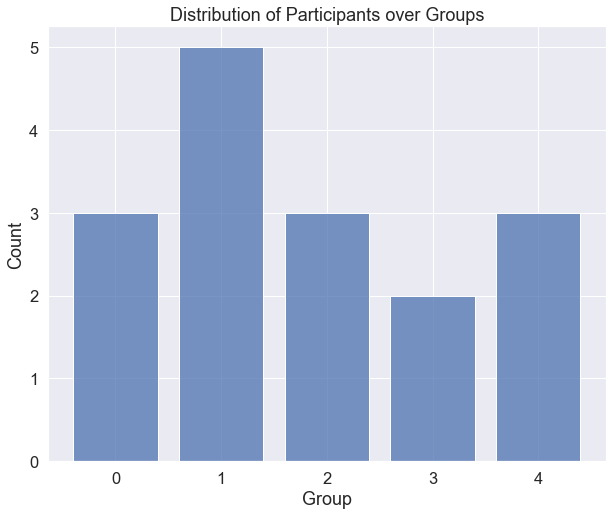

In [45]:
#count participants
parts = df['participant'].unique()
print('Number of participants: ', len(parts))
print('Their IDs: ', parts)
#group distribution
groups=[]
for p in parts:
    group = df[df['participant'] == p]['group'].median()
    groups.append(group)
groups

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


sns.histplot( data=groups, 
             stat = 'count',
             #multiple="dodge", 
             discrete = True,
             shrink=.8
            ).set_xticks(groupnames)

# Change Axis labels:

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Participants over Groups')

C:\Users\aron\.conda\envs\ba\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Temporal Progress over blocks')

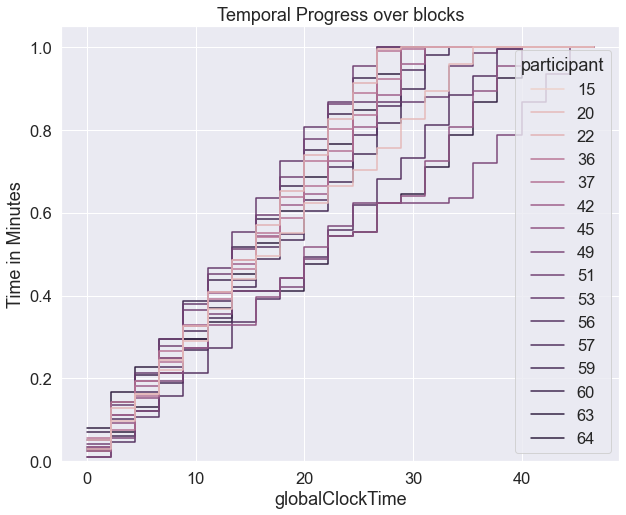

In [46]:
# plot time needed
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

time = df['globalClockTime'] / 60


sns.histplot( data=df, 
             x = time ,
             hue = 'participant',
             cumulative = True,
             element="step", fill=False,
             stat="density", 
             common_norm=False,
             #stat = 'count',
             #multiple="dodge", 
             #discrete = True,
#              shrink=.8
            )

# Change Axis labels:

#plt.xlabel('Group')
plt.ylabel('Progress')
plt.ylabel('Time in Minutes')
plt.title('Temporal Progress over blocks')

Text(0.5, 1.0, 'Distribution of Browsers over Participants')

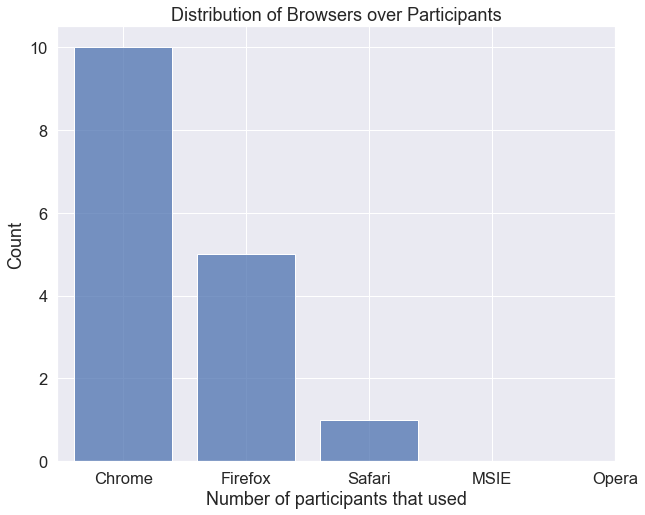

In [47]:
#browser distribution
browsers=[]
for p in parts:
    browser = df[df['participant'] == p]['browser'].any()
    browsers.append(browser)
browsers


fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


sns.histplot( data=browsers, 
             multiple="dodge", 
             shrink=.8).set_xticks(browsernames)
plt
# Change Axis labels:

plt.xlabel('Number of participants that used')
plt.ylabel('Count')
plt.title('Distribution of Browsers over Participants')

Text(0.5, 1.0, 'Distribution of OSses over Participants')

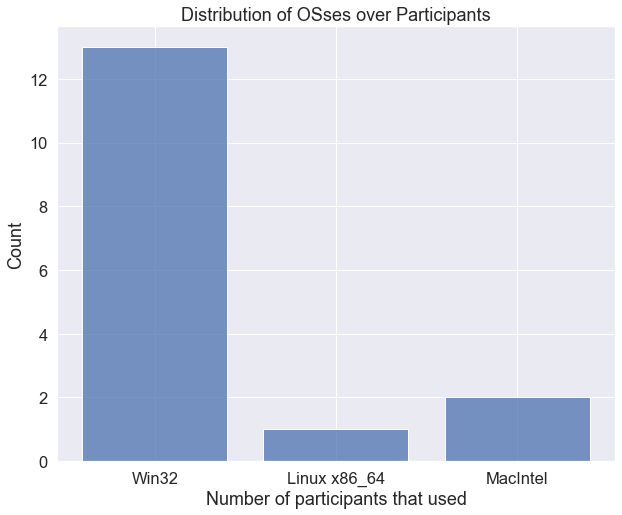

In [48]:
#OS distribution
osses=[]
for p in parts:
    os = df[df['participant'] == p]['OS'].any()
    osses.append(os)
osses

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.histplot( data=osses, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8)

# Change Axis labels:

plt.xlabel('Number of participants that used')
plt.ylabel('Count')
plt.title('Distribution of OSses over Participants')

In [49]:
#framerate distribution
framerates=[]
for p in parts:
    fr = df.loc[df['participant'] == p,['frameRate']]
    framerates.append(round(fr.iloc[0,0]))
framerates


[60, 61, 60, 60, 60, 30, 60, 60, 30, 60, 60, 60, 100, 60, 60, 20]

Text(0.5, 1.0, 'Distribution of Framerates over Participants')

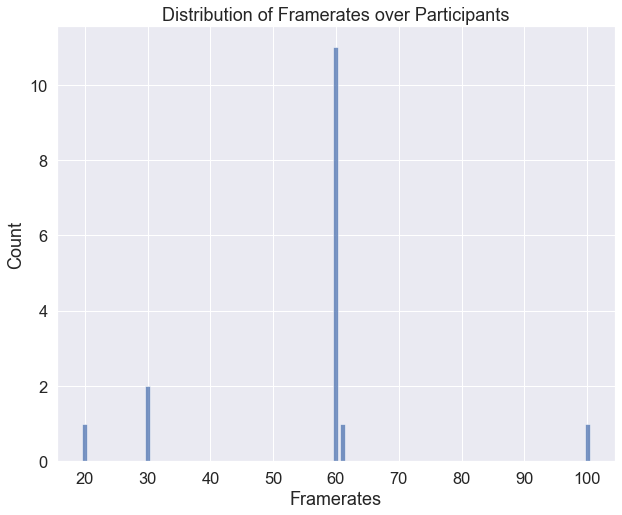

In [50]:

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

sns.histplot( data=framerates, 
            stat = 'count',
             #multiple="dodge", 
             discrete = True,
             multiple="dodge", 
             shrink=.8)

# Change Axis labels:

plt.xlabel('Framerates')
plt.ylabel('Count')
plt.title('Distribution of Framerates over Participants')

In [51]:
#resolution distribution
ressesX=[]
ressesY = []
for p in parts:
    resX = df[df['participant'] == p]['xResolution'].iloc[0]
    resY = df[df['participant'] == p]['yResolution'].iloc[0]
    ressesX.append(resX)
    ressesY.append(resY)

Text(0.5, 1.0, 'Screen ratios over Participants')

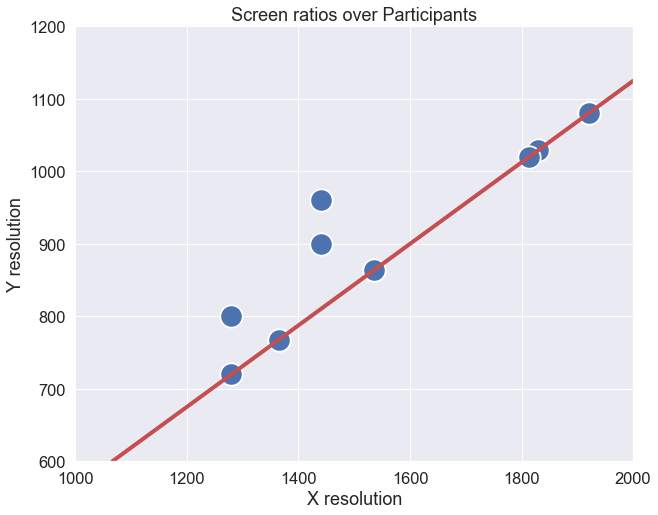

In [52]:

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.scatterplot(x= ressesX,
            y = ressesY,
                     s = 500,
           #stat = 'count',
             #multiple="dodge", 
             #discrete = True,
             #multiple="dodge", 
             #shrink=.8
           )
ax.axline((0,0), slope = 9/16, linewidth=4, color='r', label = '16:9 ratio')

ax.set(xlim=(1000,2000))
ax.set(ylim=(600,1200))

# Change Axis labels:

plt.xlabel('X resolution')
plt.ylabel('Y resolution')
plt.title('Screen ratios over Participants')

In [80]:
print(list(df['Name_optional'].unique()))

[nan, 'aron', 'A.J.', 'Manfred', '977398', 'anna z.', 'participant1']


# Analysis of choice trial
Core hypotheses: 
    RT in condition 0,1 and 3 is equivalent, 
    conditions 2 and 4 have larger RT. 
    Analogous for accuracy

## RT in choice Trial
Ideally, we can see 2 distinct peaks here, 1 close to 0 when the target was the first and a bigger one around 3 secs, where the second entity is known.

In [53]:
### Divide data into subsets correct / incorrect

# Filter out incorrect responses
df_corr = df.drop(df[df['choice_response.corr'] == 0].index)
df_corr = df_corr.drop(df_corr[df_corr['target_loc'] == 2].index)
#df_corr.shape

# Filter out correct responses
df_incorr = df.drop(df[df['choice_response.corr'] == 1].index)
df_incorr = df_incorr.drop(df_incorr[df_incorr['target_loc'] == 2].index)
#df_incorr.shape

# Only Filler trials
df_filler = df.drop(df[df['target_loc'] < 2].index)
#df_filler['target_loc'].unique()
# Only Filler trials
df_no_filler = df.drop(df[df['target_loc'] == 2].index)

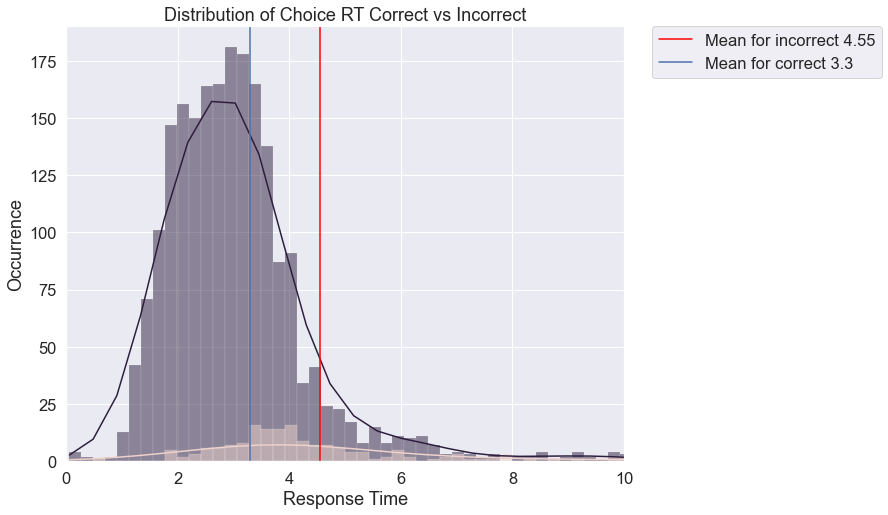

In [54]:
mean0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].mean().round(2)
mean1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].mean().round(2)
median0 = df.loc[df['choice_response.corr'] == 0]['choice_response.rt'].median().round(2)
median1 = df.loc[df['choice_response.corr'] == 1]['choice_response.rt'].median().round(2)

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.histplot(data = df_no_filler,
             x = 'choice_response.rt',
             hue = 'choice_response.corr',
            #col = 'imagePos',
            # label = ,
            kde=True)

ax.axvline(mean0,label = 'Mean for incorrect ' + str(mean0), 
           color = 'red'
          )
ax.axvline(mean1,label = 'Mean for correct ' + str(mean1),
         #  color = 'green'
          )

ax.set(xlim=(0, 10))


# Change Axis labels:
plt.xlabel('Response Time')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT Correct vs Incorrect')
plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

## Data repair

In [55]:
mean0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].mean().round(2)
mean1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].mean().round(2)
mean2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].mean().round(2)

median0 = df.loc[df['target_loc'] == 0]['choice_response.rt'].median().round(2)
median1 = df.loc[df['target_loc'] == 1]['choice_response.rt'].median().round(2)
median2 = df.loc[df['target_loc'] == 2]['choice_response.rt'].median().round(2)

print('Mean and Median when Target left: ', mean0, median0)
print('Mean and Median when Target right: ', mean1, median1)
print('Mean and Median when Target wrong: ', mean2, median2)

Mean and Median when Target left:  3.04 2.47
Mean and Median when Target right:  3.62 3.2
Mean and Median when Target wrong:  4.2 3.59


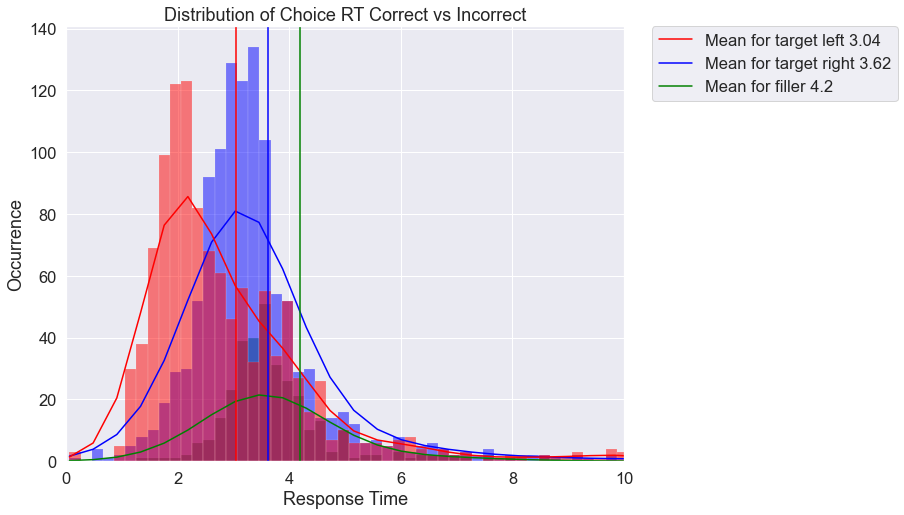

In [56]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.histplot(data = df,
             x = 'choice_response.rt',
             hue = 'target_loc',
             #label=["Target left", 'Target right', 'filler'],
                  legend = True,
            kde=True,
                 palette = ['red','blue','green'])

ax.axvline(mean0,label = 'Mean for target left ' + str(mean0), 
           color = 'red'
          )
ax.axvline(mean1,label = 'Mean for target right ' + str(mean1),
           color = 'blue'
          )
ax.axvline(mean2,label = 'Mean for filler ' + str(mean2), 
           color = 'green'
          )
ax.set(xlim=(0, 10))

#plt.legend()

# Change Axis labels:
plt.xlabel('Response Time')
plt.ylabel('Occurrence')
plt.title('Distribution of Choice RT Correct vs Incorrect')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("Distribution of Choice RT Correct vs Incorrect.png", dpi=300, bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'Response times over participants in choice trial')

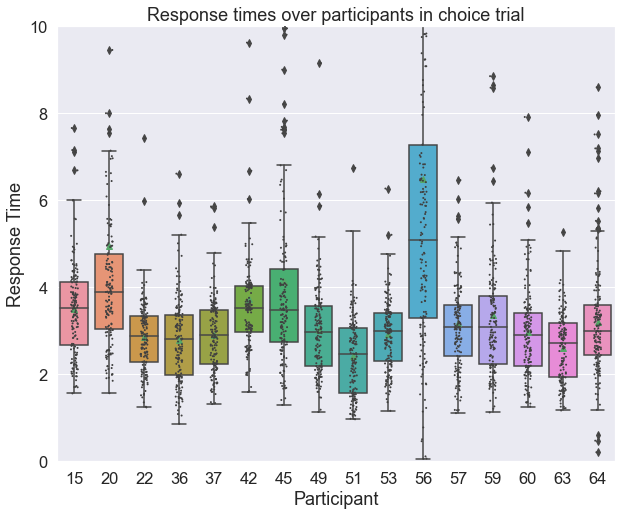

In [57]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="participant",
                 data=df,
                showmeans=True)

sns.stripplot(y='choice_response.rt', 
                 x="participant",
                 data=df,
             color=".25",
             size = 2)
ax.set(ylim=(0, 10))

# Change Axis labels:
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times over participants in choice trial')

Text(0.5, 1.0, 'correct response times over participants in choice trial')

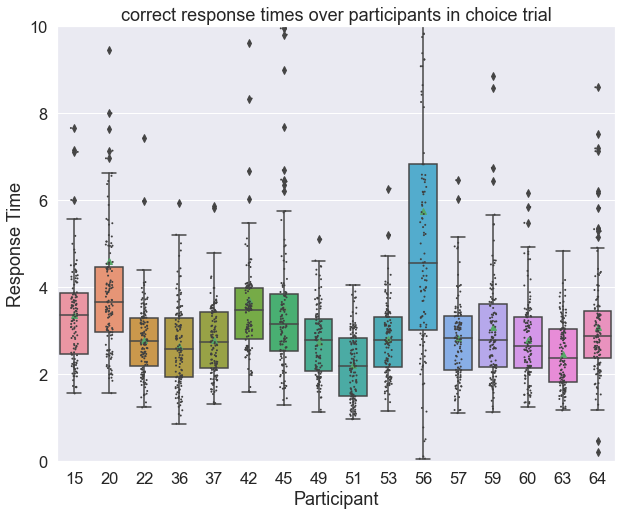

In [58]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="participant",
                 data=df_corr,
                showmeans=True)

sns.stripplot(y='choice_response.rt', 
                 x="participant",
                 data=df_corr,
             color=".25",
             size = 2)
ax.set(ylim=(0, 10))

# Change Axis labels:
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('correct response times over participants in choice trial')

In [59]:
# calculate median rt for cond 0 when correct as baseline
median_cond0 = df_corr.loc[df_corr['cond'] == 0]['choice_response.rt'].median()
median_cond0

2.7848950000479817

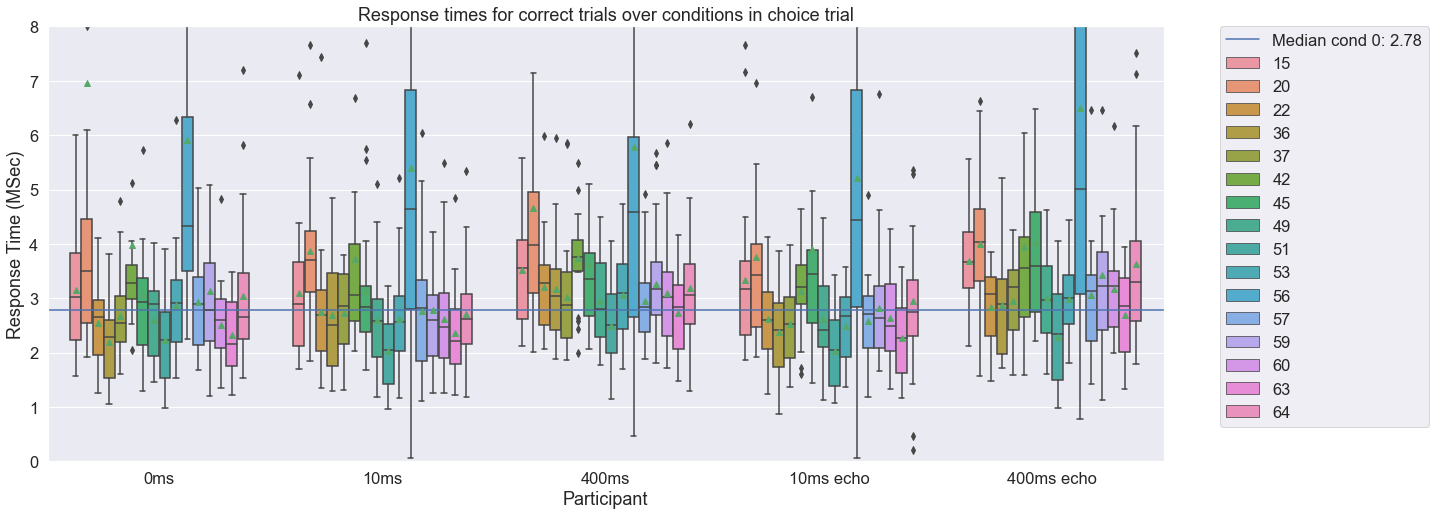

In [60]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(20, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="cond",
                 hue = "participant",
                 data=df_corr,
                showmeans=True)
ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)))

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Participant')
plt.ylabel('Response Time (MSec)')
plt.title('Response times for correct trials over conditions in choice trial')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

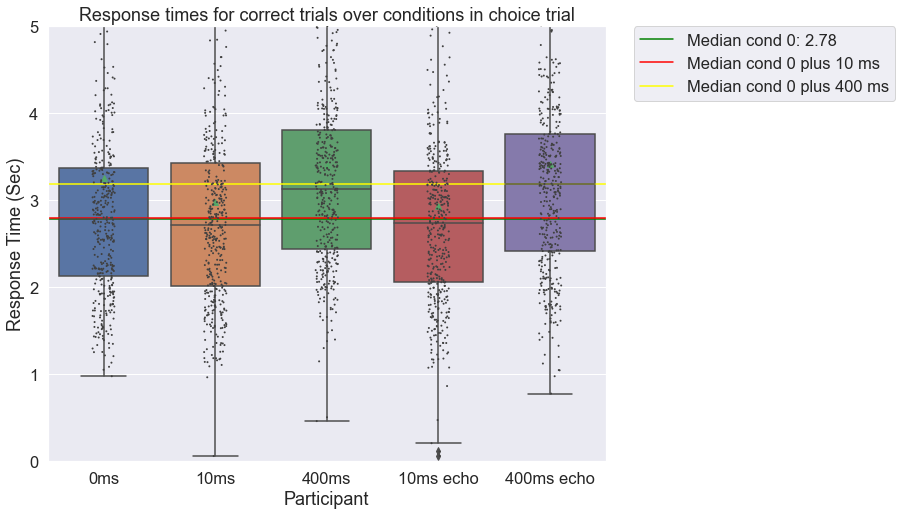

In [61]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='choice_response.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df_corr,
                 #order = condition_values,
                showmeans=True)
sns.stripplot(y='choice_response.rt', 
                 x="cond",
                 data=df_corr,
             color=".25",
             size = 2)

ax.axhline(median_cond0, label = 'Median cond 0: ' + str(round(median_cond0,2)),color = 'green')
ax.axhline(median_cond0 + 0.01, label = 'Median cond 0 plus 10 ms', color = 'red')
ax.axhline(median_cond0 + 0.4, label = 'Median cond 0 plus 400 ms', color = 'yellow')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#results = add_stat_annotation(ax, data=df_corr, y='choice_response.rt', x="cond", test='Mann-Whitney', order = order, box_pairs=[(0, 1)])
#results
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5))
plt.xlabel('Participant')
plt.ylabel('Response Time (Sec)')
plt.title('Response times for correct trials over conditions in choice trial')

plt.savefig("Response times for correct trials over conditions in choice trial.png", dpi=300, bbox_inches='tight')

Text(0.5, 0.98, 'RTs over all correctly answered trials')

<Figure size 432x288 with 0 Axes>

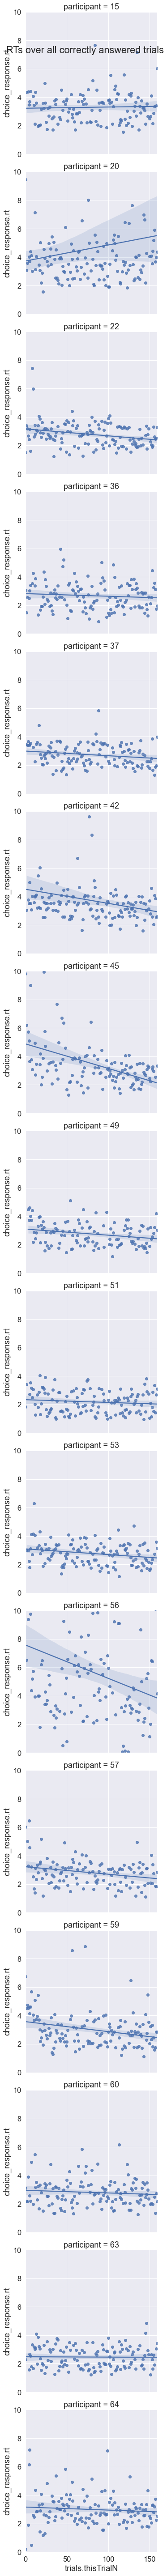

In [62]:
fig = plt.gcf()
# Change seaborn plot size
#fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.lmplot(y='choice_response.rt',
             x='trials.thisTrialN',
            row = 'participant',
            #data=df
            data = df_corr
               )

ax.set(ylim=(0, 10))


# Change Axis labels:
#plt.legend(loc = 'upper left')

plt.suptitle('RTs over all correctly answered trials')


Text(0.5, 0.98, 'RTs over all correctly answered trials')

<Figure size 432x288 with 0 Axes>

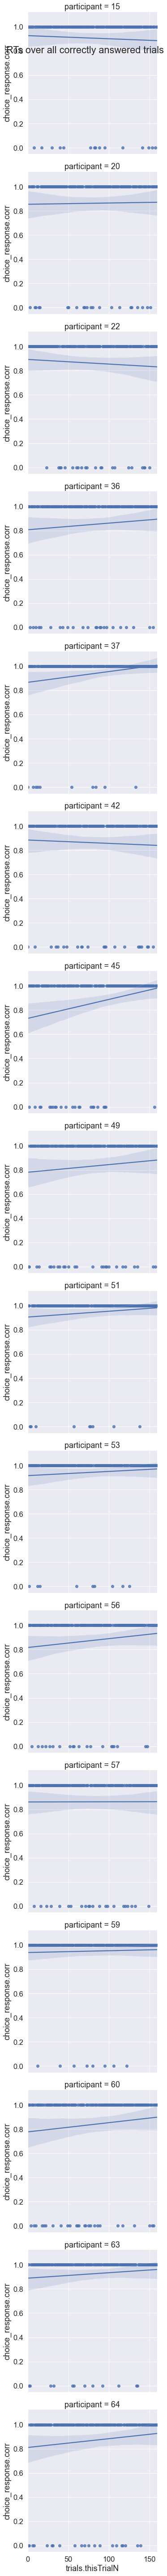

In [63]:
fig = plt.gcf()
# Change seaborn plot size
#fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.lmplot(y='choice_response.corr',
             x='trials.thisTrialN',
            row = 'participant',
            #data=df
            data = df
               )

#ax.set(ylim=(0, 10))


# Change Axis labels:
#plt.legend(loc = 'upper left')

plt.suptitle('RTs over all correctly answered trials')


## Accuracy in choice

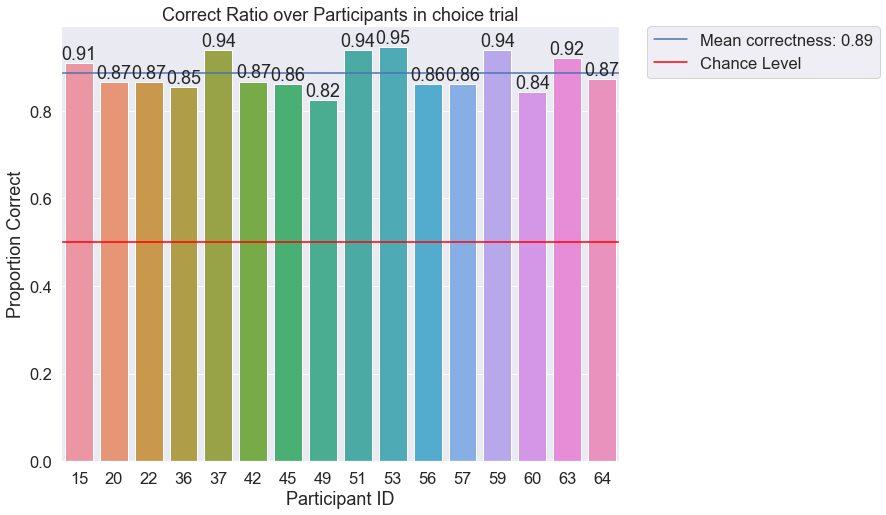

In [64]:
# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y='choice_response.corr',
                x= 'participant',
                 data=df, 
                  ci=None
                 #estimator=lambda y: len(y) / len(df) * 100
                )

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axhline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('Correct Ratio over Participants in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("Correct Ratio over Participants in choice trial.png", dpi=300, bbox_inches='tight')

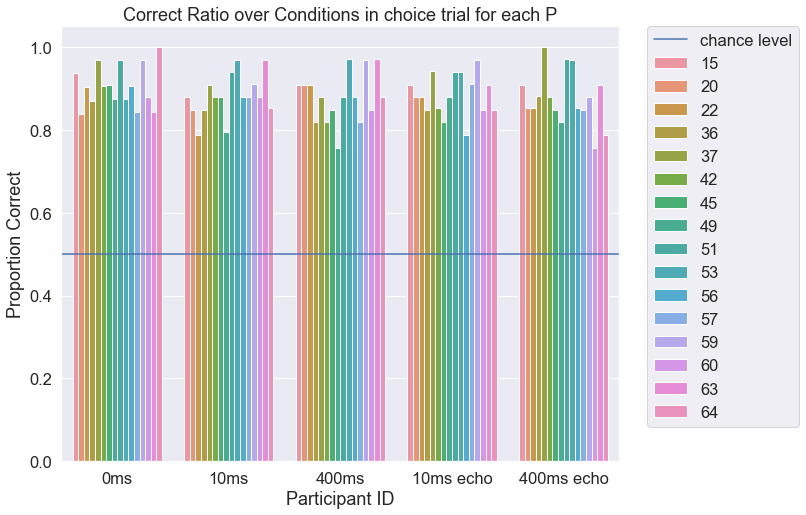

In [65]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y= 'choice_response.corr',
              hue="participant",
                 x = 'cond',
                  ci=None,
              data=df)

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'chance level')
ax.set_xticklabels(condition_values)


plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('Correct Ratio over Conditions in choice trial for each P')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


No handles with labels found to put in legend.


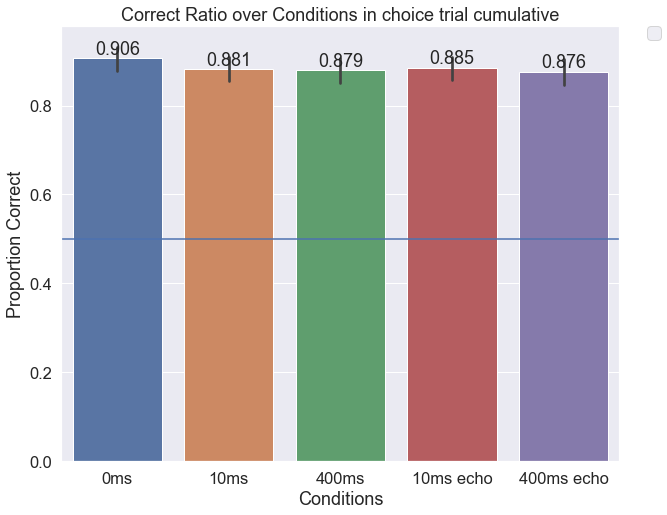

In [66]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y= 'choice_response.corr',
              #hue="participant",
                 x = 'cond',
                  #ci=None,
              data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5)
ax.set_xticklabels(condition_values)

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Conditions')
#plt.ylabel('Count')
plt.title('Correct Ratio over Conditions in choice trial cumulative')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("Correct Ratio over Conditions in choice trial cumulative.png", dpi=300, bbox_inches='tight')

# Analysis of SJ Trial 

We expect people not to be able to detect condition 1 and 3 , so we should see chance level performance
W

## Accuracy in SJ


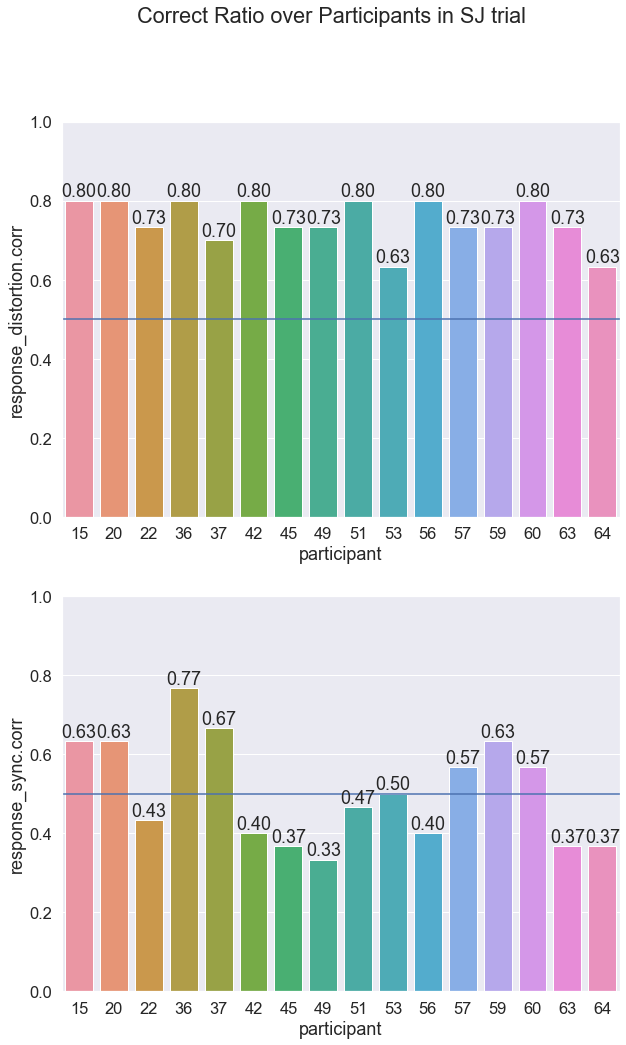

In [67]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(10, 16)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.barplot(y= 'response_distortion.corr',
              x="participant",
               ax = axes[0],
                  ci=None,
              data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.axhline(0.5)
ax.set(ylim=(0, 1))

ax2 = sns.barplot(y= 'response_sync.corr',
              x="participant",
               ax = axes[1],
                ci=None,
              data=df)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))

plt.suptitle('Correct Ratio over Participants in SJ trial')

plt.savefig("Correct Ratio over Participants in SJ trial.png", dpi=300, bbox_inches='tight')

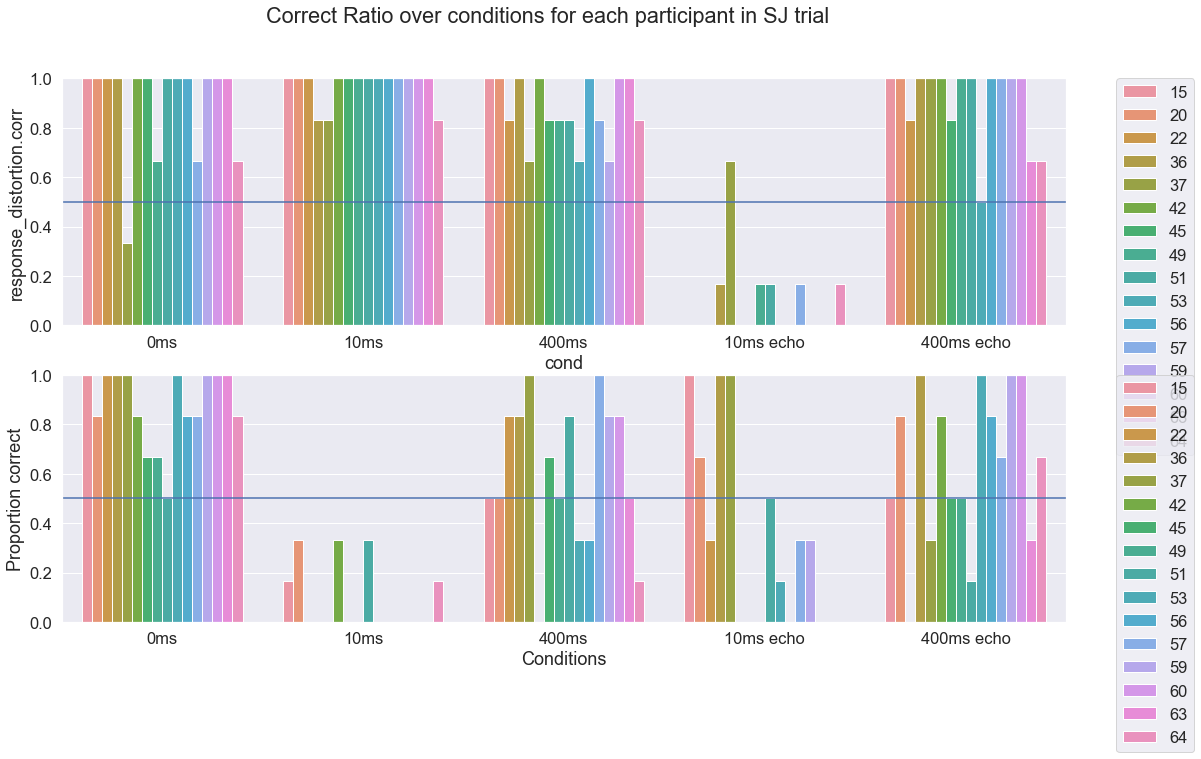

In [68]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(18, 10)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.barplot(y= 'response_distortion.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[0],
                  ci=None,
              data=df)
ax.set_xticklabels(condition_values)
ax.axhline(0.5)
ax.set(ylim=(0, 1))
plt.xlabel('Conditions')
plt.ylabel('Proportion correct')


ax2 = sns.barplot(y= 'response_sync.corr',
              hue="participant",
                 x = 'cond',
               ax = axes[1],
                ci=None,
              data=df)
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))

ax2.set_xticklabels(condition_values)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xlabel('Conditions')
plt.ylabel('Proportion correct')
plt.suptitle('Correct Ratio over conditions for each participant in SJ trial')

plt.savefig("Correct Ratio over conditions for each participant in SJ trial.png", dpi=300, bbox_inches='tight')

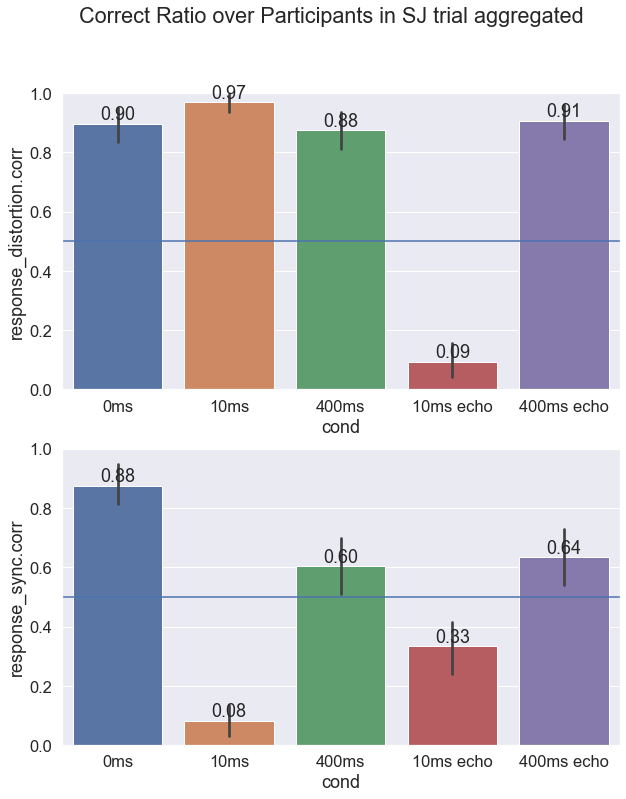

In [69]:
fig, axes = plt.subplots(2, 1)
# Change seaborn plot size
fig.set_size_inches(10, 12)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.barplot(y= 'response_distortion.corr',
              #hue="participant",
                 x = 'cond',
               ax = axes[0],
                  #ci=None,
              data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xticklabels(condition_values)
ax.axhline(0.5)
ax.set(ylim=(0, 1))
ax2 = sns.barplot(y= 'response_sync.corr',
              #hue="participant",
                 x = 'cond',
               ax = axes[1],
                #ci=None,
              data=df)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax2.axhline(0.5)
ax2.set(ylim=(0, 1))
ax2.set_xticklabels(condition_values)

plt.suptitle('Correct Ratio over Participants in SJ trial aggregated')

plt.savefig("Correct Ratio over Participants in SJ trial aggregated.png", dpi=300, bbox_inches='tight')

## RT in SJ
We expect people to take longer, when they are uncertain, so RT should be fastest where performance is highest. 

Text(0.5, 15.440000000000012, 'Participant')

<Figure size 1152x576 with 0 Axes>

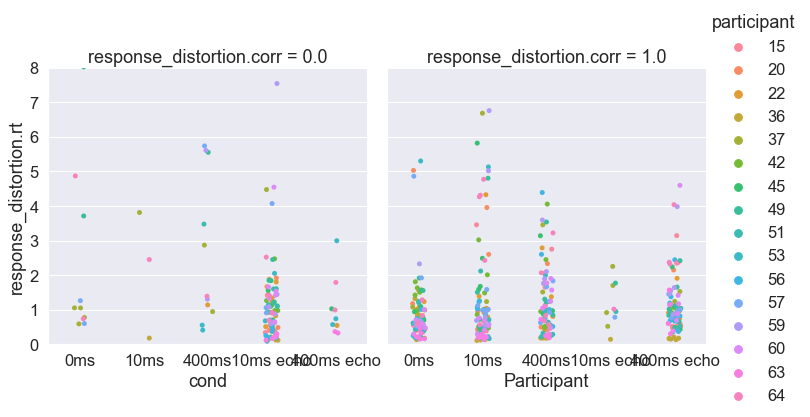

In [70]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.catplot(y='response_distortion.rt', 
                 x="cond",
                 hue = "participant",
                 col = 'response_distortion.corr',
                 data=df,
               # showmeans=True
                )

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Participant')
#plt.ylabel('Response Time (MSec)')
#plt.title('Response times for all trials over conditions in sj trial')


<Figure size 1152x576 with 0 Axes>

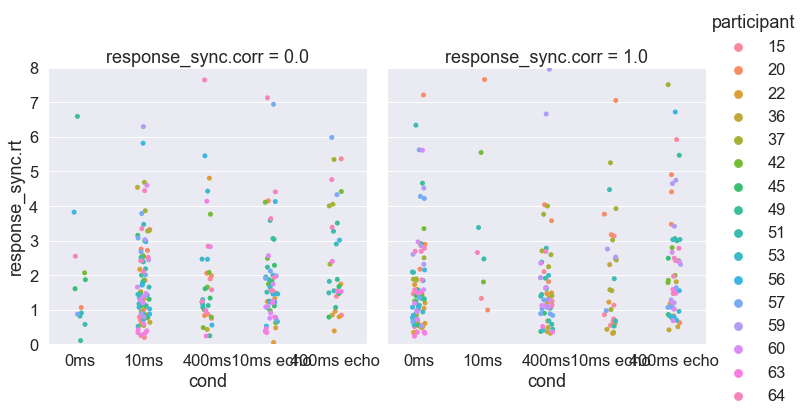

In [71]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.catplot(y='response_sync.rt', 
                 x="cond",
                 hue = "participant",
                 col = 'response_sync.corr',
                 data=df,
               # showmeans=True
                )

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
#plt.xlabel('Participant')
#plt.ylabel('Response Time (MSec)')
#plt.title('Response times for all trials over conditions in sj trial')


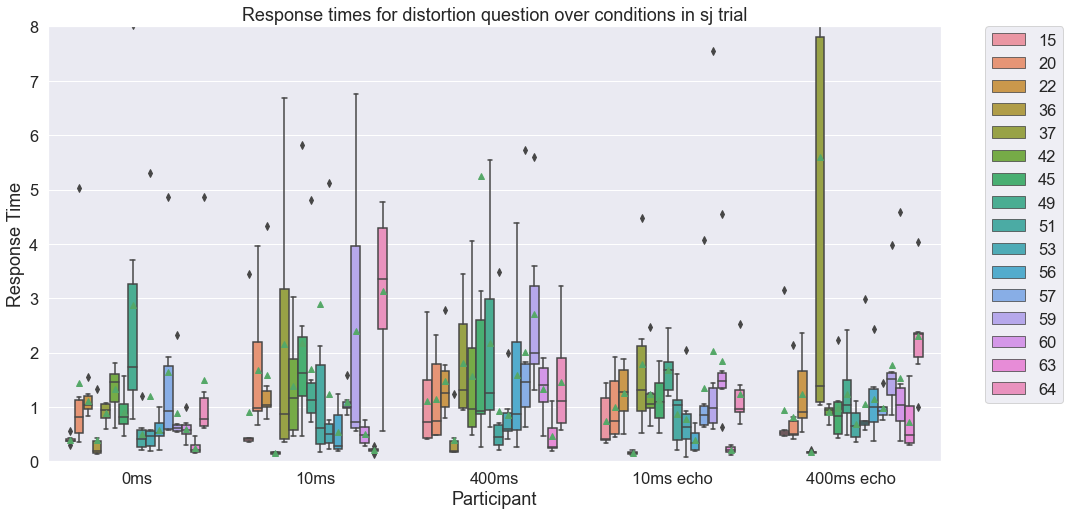

In [72]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='response_distortion.rt', 
                 x="cond",
                 hue = "participant",
                 data=df,
                showmeans=True)

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 8))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times for distortion question over conditions in sj trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


No handles with labels found to put in legend.


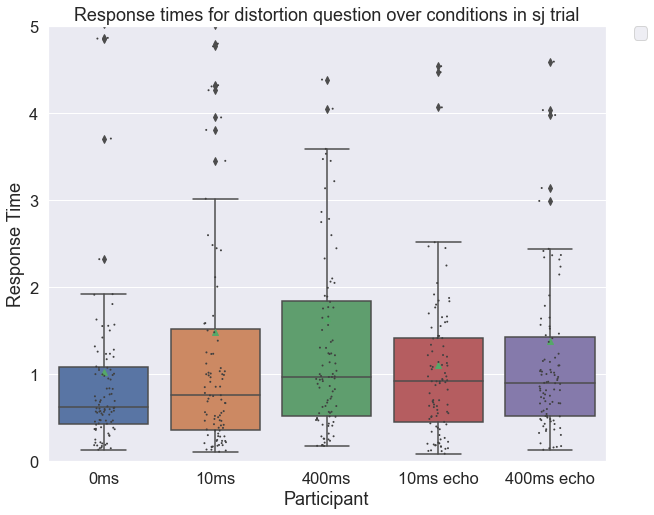

In [73]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='response_distortion.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df,
                showmeans=True)
ax = sns.stripplot(y='response_distortion.rt', 
                 x="cond",
                 data=df,
             color=".25",
             size = 2)

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('Response times for distortion question over conditions in sj trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 1.0, 'RT for asynchrony question over conditions in sj trial')

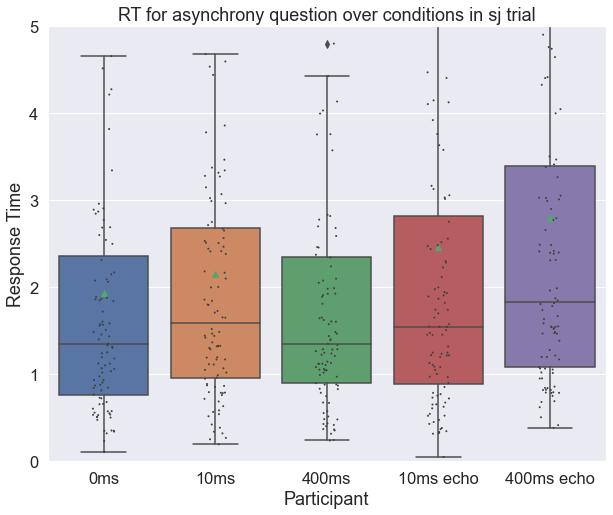

In [74]:
#mean rt of all participants

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(10, 8)

# Increase font size
sns.set(font_scale=1.5)


ax = sns.boxplot(y='response_sync.rt', 
                 x="cond",
                 #hue = "participant",
                 data=df,
                showmeans=True)
ax = sns.stripplot(y='response_sync.rt', 
                 x="cond",
                 data=df,
             color=".25",
             size = 2)

# Change Axis labels:
ax.set_xticklabels(condition_values)
ax.set(ylim=(0, 5))
plt.xlabel('Participant')
plt.ylabel('Response Time')
plt.title('RT for asynchrony question over conditions in sj trial')


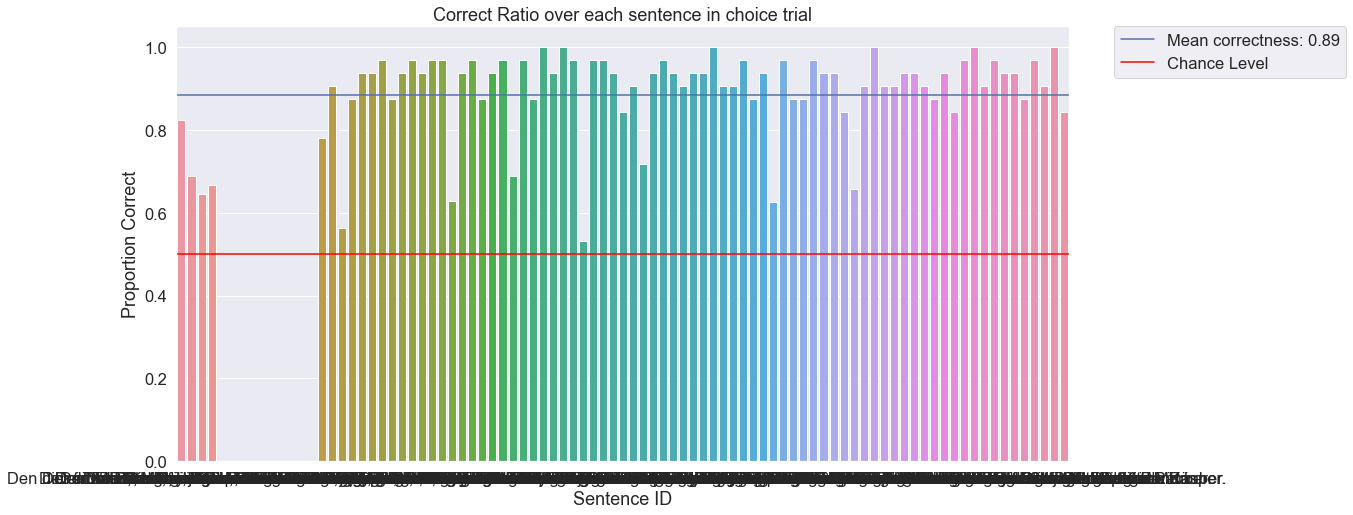

In [75]:
#correctness over items

# calculate mean corr
mean_corr = df['choice_response.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y='choice_response.corr',
                x= 'sentence',
                 data=df, 
                  ci=None
                )

ax.axhline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Sentence ID')
#plt.ylabel('Count')
plt.title('Correct Ratio over each sentence in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("Correct Ratio over each sentence in choice trial.png", dpi=300, bbox_inches='tight')

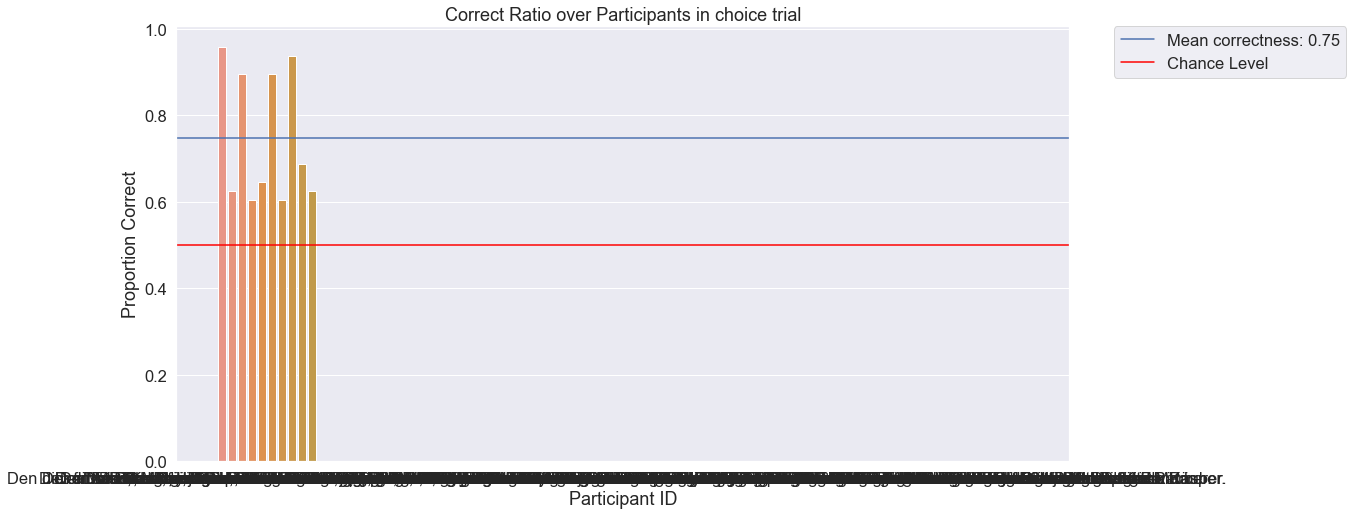

In [76]:
#correctness over items

# calculate mean corr
mean_corr = df['response_distortion.corr'].mean()
mean_corr

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(16, 8)

# Increase font size
sns.set(font_scale=1.5)

ax = sns.barplot(y='response_distortion.corr',
                x= 'sentence',
                 data=df, 
                  ci=None
                )

ax.axhline(mean_corr, label = 'Mean correctness: ' + str(round(mean_corr, 2)))

ax.set(ylabel="Proportion Correct")
ax.axhline(0.5, label = 'Chance Level', color = 'red')

# Change Axis labels:
#plt.legend(loc = 'upper left')
plt.xlabel('Participant ID')
#plt.ylabel('Count')
plt.title('Correct Ratio over Participants in choice trial')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)